In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from utils import (
    calculate_stats,
    find_cointegrated_pairs,
    find_distance_pairs,
    find_pairs_from_list,
    find_pairs_from_two_lists,
    pairs_trade,
    pairs_trade_loop,
    pairs_trade_with_selection,
)


warnings.filterwarnings("ignore")

In [5]:
# load preprocessed data
data_df = pd.read_csv("data.csv", index_col=0)
data_df.head()

,ethanol,oats,wheat,sugarcane,canola,soybean,corn,gasolinerbob
Date,,,,,,,,
2000-01-04,1.285,109.00,247.25,5.77,251.3,464.25,203.00,0.6850
2000-01-05,1.286,109.25,249.75,5.81,252.6,469.25,203.00,0.6758
2000-01-06,1.280,109.00,248.50,5.77,254.7,468.00,203.75,0.6789
2000-01-07,1.280,109.50,251.75,5.84,256.5,471.50,207.00,0.6610
2000-01-10,1.281,109.50,253.50,5.83,253.8,473.50,208.50,0.6696


## Trading without Pair Selectioin

### Example 6 month of trading a single pair

return over the 6 month period is 0.051


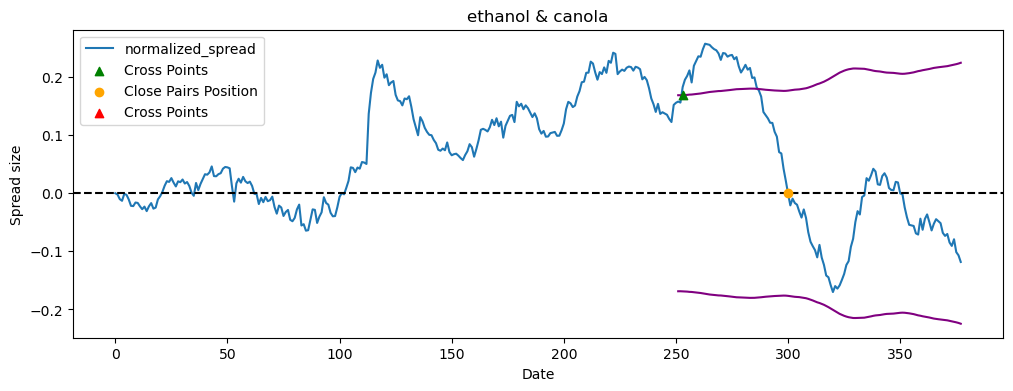

In [6]:
import warnings


warnings.filterwarnings("ignore")

############ INPUTS #########################
window_size = 252
i = 0
sigma = 2
asset_a = "ethanol"
asset_b = "canola"
transaction_cost = 0.005
############################################

temp_df, pair_return_list, final_cum_return = pairs_trade(
    data_df[i : i + window_size + 126],
    asset_a,
    asset_b,
    sigma=sigma,
    window_size=window_size,
    transaction_cost=transaction_cost,
    plot=True,
)
print(f"return over the 6 month period is {final_cum_return:.3f}")

In [7]:
calculate_stats(pair_return_list)

{'mean_return': 0.056421132862644496,
 'std_return': 0.0,
 'min_return': 0.056421132862644496,
 'max_return': 0.056421132862644496,
 'q1_return': 0.056421132862644496,
 'q3_return': 0.056421132862644496,
 'sharpe_ratio': nan,
 'skew_return': nan,
 'kurtosis_return': nan}

### Single pair 6 month trading (1 month step interval)

In [5]:
asset_a = "ethanol"
asset_b = "sugarcane"
step_size = 20
results = pairs_trade_loop(data_df, asset_a, asset_b, step_size)

(array([ 3.,  7.,  6., 12., 12., 37., 39., 40., 43., 33., 27., 22., 11.,
        11.,  5.,  3.,  2.,  2.,  0.,  1.]),
 array([-0.29966913, -0.26886121, -0.23805329, -0.20724537, -0.17643745,
        -0.14562952, -0.1148216 , -0.08401368, -0.05320576, -0.02239784,
         0.00841008,  0.039218  ,  0.07002592,  0.10083384,  0.13164176,
         0.16244968,  0.1932576 ,  0.22406552,  0.25487344,  0.28568136,
         0.31648928]),
 <BarContainer object of 20 artists>)

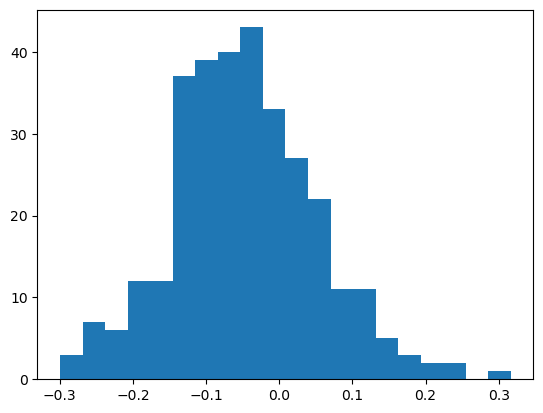

In [6]:
plt.hist(results, bins=20)

### Multiple iterations

In [7]:
def annualize_return(returns, days_trading=252):
    return (1 + returns) ** (252 / days_trading) - 1

In [8]:
commodity_pairs = find_pairs_from_list(data_df.columns[:].tolist())
print(len(commodity_pairs), commodity_pairs)

step_size = 20
transaction_cost = 0.005

28 [('ethanol', 'oats'), ('ethanol', 'wheat'), ('ethanol', 'sugarcane'), ('ethanol', 'canola'), ('ethanol', 'soybean'), ('ethanol', 'corn'), ('ethanol', 'crudeoil'), ('oats', 'wheat'), ('oats', 'sugarcane'), ('oats', 'canola'), ('oats', 'soybean'), ('oats', 'corn'), ('oats', 'crudeoil'), ('wheat', 'sugarcane'), ('wheat', 'canola'), ('wheat', 'soybean'), ('wheat', 'corn'), ('wheat', 'crudeoil'), ('sugarcane', 'canola'), ('sugarcane', 'soybean'), ('sugarcane', 'corn'), ('sugarcane', 'crudeoil'), ('canola', 'soybean'), ('canola', 'corn'), ('canola', 'crudeoil'), ('soybean', 'corn'), ('soybean', 'crudeoil'), ('corn', 'crudeoil')]


100%|██████████| 28/28 [03:24<00:00,  7.32s/it]

Mean Return: 0.024220030572476584
Standard Deviation: 0.09374093679525715
Minimum Return: -0.395626648514958
Maximum Return: 1.5570715081345194
25th Percentile (Q1): -0.010530481938142489
75th Percentile (Q3): 0.07218558541557274
Sharpe Ratio: 0.25837197067249706
Skewness: 1.827643045346069
Kurtosis: 26.177516598320032


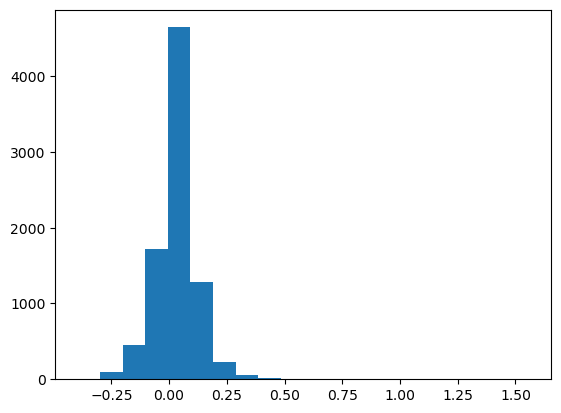

In [9]:
# all pairs
results = []
for i, j in tqdm(commodity_pairs):
    # _, temp = pairs_trade(data_df, i, j, window_size=252, sigma=2, transaction_cost=0.01, plot=True, figsize=(12, 4))
    temp = pairs_trade_loop(
        data_df, i, j, window_size=252, sigma=2, transaction_cost=0.005, plot=False, figsize=(12, 4)
    )
    results.extend(temp)

plt.hist(results, bins=20)
summary_stats = calculate_stats(results, printing=True)

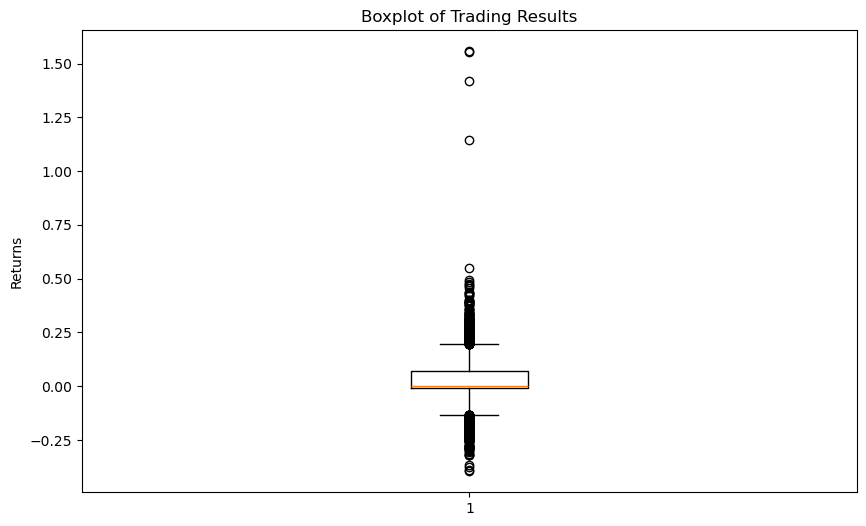

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot(results)
plt.title("Boxplot of Trading Results")
plt.ylabel("Returns")
plt.show()

In [11]:
calculate_stats(results)

{'mean_return': 0.024220030572476584,
 'std_return': 0.09374093679525715,
 'min_return': -0.395626648514958,
 'max_return': 1.5570715081345194,
 'q1_return': -0.010530481938142489,
 'q3_return': 0.07218558541557274,
 'sharpe_ratio': 0.25837197067249706,
 'skew_return': 1.827643045346069,
 'kurtosis_return': 26.177516598320032}

In [12]:
# Biodiesel feedstocks
biodiesel_feedstocks = ["canola", "oats", "soybean"]
biodiesel_feedstocks_pairs = find_pairs_from_list(biodiesel_feedstocks)
biodiesel_returns = []

for i, j in biodiesel_feedstocks_pairs:
    # _, temp = pairs_trade(data_df, i, j, window_size=252, sigma=2, transaction_cost=0.01, plot=True, figsize=(12, 4))
    temp = pairs_trade_loop(data_df, i, j, transaction_cost=transaction_cost)
    biodiesel_returns.extend(temp)

results_biodiesel_feedstocks = calculate_stats(biodiesel_returns, printing=True)

Mean Return: 0.016593527679442218
Standard Deviation: 0.0710824922206779
Minimum Return: -0.28530314460833495
Maximum Return: 0.24867523072308728
25th Percentile (Q1): -0.009473508529821206
75th Percentile (Q3): 0.054600636155224425
Sharpe Ratio: 0.23344043182851654
Skewness: 0.0005338038419145945
Kurtosis: 1.5511067889102126


In [13]:
calculate_stats(annualize_return(np.array(biodiesel_returns)))

{'mean_return': 0.016593527679442218,
 'std_return': 0.0710824922206779,
 'min_return': -0.28530314460833495,
 'max_return': 0.24867523072308728,
 'q1_return': -0.009473508529821206,
 'q3_return': 0.054600636155224425,
 'sharpe_ratio': 0.23344043182851654,
 'skew_return': 0.0005338038419145945,
 'kurtosis_return': 1.5511067889102126}

In [14]:
ethanol_feedstocks = ["corn", "wheat", "sugarcane"]
ethanol_feedstocks_pairs = find_pairs_from_list(ethanol_feedstocks)
ethanol_returns = []

for i, j in ethanol_feedstocks_pairs:
    # _, temp = pairs_trade(data_df, i, j, window_size=252, sigma=2, transaction_cost=0.01, plot=True, figsize=(12, 4))
    temp = pairs_trade_loop(data_df, i, j, transaction_cost=transaction_cost)
    ethanol_returns.extend(temp)

results_ethanol_feedstocks = calculate_stats(ethanol_returns, printing=True)

Mean Return: 0.00770800607178115
Standard Deviation: 0.08833636095363523
Minimum Return: -0.3206046455870848
Maximum Return: 0.26515184681798964
25th Percentile (Q1): -0.026134044984147065
75th Percentile (Q3): 0.06077593738533554
Sharpe Ratio: 0.0872574553509944
Skewness: -0.3271888169994612
Kurtosis: 0.7852854426058995


In [15]:
calculate_stats(annualize_return(np.array(ethanol_returns)))

{'mean_return': 0.00770800607178115,
 'std_return': 0.08833636095363523,
 'min_return': -0.3206046455870848,
 'max_return': 0.26515184681798964,
 'q1_return': -0.026134044984147065,
 'q3_return': 0.06077593738533554,
 'sharpe_ratio': 0.0872574553509944,
 'skew_return': -0.3271888169994612,
 'kurtosis_return': 0.7852854426058995}

In [16]:
### ethanol은 오히려 gasoline이랑 pairing 가능한 거 아닌가?
fuel_feedstocks = ["ethanol", "crudeoil"]
fuel_feedstocks_pairs = find_pairs_from_list(fuel_feedstocks)
fuel_returns = []

for i, j in fuel_feedstocks_pairs:
    # _, temp = pairs_trade(data_df, i, j, window_size=252, sigma=2, transaction_cost=0.01, plot=True, figsize=(12, 4))
    temp = pairs_trade_loop(data_df, i, j, transaction_cost=transaction_cost)
    fuel_returns.extend(temp)

results_fuel_feedstocks = calculate_stats(fuel_returns, printing=True)

Mean Return: 0.07517828252376457
Standard Deviation: 0.19111784671828744
Minimum Return: -0.22453795953211275
Maximum Return: 1.5570715081345194
25th Percentile (Q1): 0.0
75th Percentile (Q3): 0.12255483501051967
Sharpe Ratio: 0.39336087034602935
Skewness: 4.85828046110439
Kurtosis: 32.407036064364945


In [17]:
calculate_stats(annualize_return(np.array(fuel_returns)))

{'mean_return': 0.07517828252376457,
 'std_return': 0.19111784671828744,
 'min_return': -0.22453795953211275,
 'max_return': 1.5570715081345194,
 'q1_return': 0.0,
 'q3_return': 0.12255483501051967,
 'sharpe_ratio': 0.39336087034602935,
 'skew_return': 4.85828046110439,
 'kurtosis_return': 32.407036064364945}

In [18]:
biodiesel_ethanol_feedstocks_pairs = find_pairs_from_two_lists(biodiesel_feedstocks, ethanol_feedstocks)
results = []

for i, j in biodiesel_ethanol_feedstocks_pairs:
    # _, temp = pairs_trade(data_df, i, j, window_size=252, sigma=2, transaction_cost=0.01, plot=True, figsize=(12, 4))
    temp = pairs_trade_loop(data_df, i, j, transaction_cost=transaction_cost)
    results.extend(temp)

results_biodiesel_ethanol_feedstocks = calculate_stats(annualize_return(np.array(results)))

In [19]:
biodiesel_fuel_pairs = find_pairs_from_two_lists(biodiesel_feedstocks, fuel_feedstocks)
results = []

for i, j in biodiesel_fuel_pairs:
    # _, temp = pairs_trade(data_df, i, j, window_size=252, sigma=2, transaction_cost=0.01, plot=True, figsize=(12, 4))
    temp = pairs_trade_loop(data_df, i, j, transaction_cost=transaction_cost)
    results.extend(temp)

results_biodiesel_fuel_feedstocks = calculate_stats(annualize_return(np.array(results)), printing=True)

Mean Return: 0.03372907676218169
Standard Deviation: 0.09704809043153777
Minimum Return: -0.395626648514958
Maximum Return: 0.4820958836468412
25th Percentile (Q1): 0.0
75th Percentile (Q3): 0.08842556759336567
Sharpe Ratio: 0.347550133260744
Skewness: 0.05296220002458356
Kurtosis: 2.263739710763292


In [20]:
ethanol_fuel_pairs = find_pairs_from_two_lists(ethanol_feedstocks, fuel_feedstocks)
results = []

for i, j in ethanol_fuel_pairs:
    # _, temp = pairs_trade(data_df, i, j, window_size=252, sigma=2, transaction_cost=0.01, plot=True, figsize=(12, 4))
    temp = pairs_trade_loop(data_df, i, j, transaction_cost=transaction_cost)
    results.extend(temp)

results_ethanol_fuel_feedstocks = calculate_stats(annualize_return(np.array(results)))

## Pair Selection Stage

- Input: A dataframe of closing prices
  - Assert that the length of the dataframe is at least 18 months
- Optional inputs: optimal_threshold, trading_cost, specific pairs,


- Form pairs by using 12 months of daily price data and then trade them in the subsequent 6-month interval.
- Form pairs by finding a "partner" that minimizes the sum of squared differences (SSD) in the normalized prices of the two stocks
- $1 long and short positions.
- Repeat the 12+6 implementation cycle every month.
- all trades have a one-day delay to alleviate concerns reparding potential upward bias in the reported returns induced by bid-ask bounce.

### Co-integration

In [ ]:
data_df = pd.read_csv("data.csv", index_col=0)
data_df.head()

,ethanol,oats,wheat,sugarcane,canola,soybean,corn,crudeoil
Date,,,,,,,,
2000-01-04,1.285,109.00,247.25,5.77,251.3,464.25,203.00,25.55
2000-01-05,1.286,109.25,249.75,5.81,252.6,469.25,203.00,24.91
2000-01-06,1.280,109.00,248.50,5.77,254.7,468.00,203.75,24.78
2000-01-07,1.280,109.50,251.75,5.84,256.5,471.50,207.00,24.22
2000-01-10,1.281,109.50,253.50,5.83,253.8,473.50,208.50,24.67


In [22]:
p_value_matrix, cointegrated_pairs = find_cointegrated_pairs(data_df)
print(cointegrated_pairs)

[('ethanol', 'crudeoil', np.float64(1.8657815429781206e-06)), ('ethanol', 'corn', np.float64(0.0003152380519121653)), ('wheat', 'soybean', np.float64(0.0006353091683654196)), ('wheat', 'crudeoil', np.float64(0.0008012693618155364)), ('ethanol', 'wheat', np.float64(0.0008093570447663953)), ('wheat', 'corn', np.float64(0.0008827898109840003)), ('ethanol', 'soybean', np.float64(0.0012624476374753482)), ('ethanol', 'sugarcane', np.float64(0.0024586250444558993)), ('ethanol', 'oats', np.float64(0.002637481483614353)), ('sugarcane', 'corn', np.float64(0.005873716230034396)), ('sugarcane', 'soybean', np.float64(0.007215053159190674)), ('ethanol', 'canola', np.float64(0.009653476699917379)), ('oats', 'soybean', np.float64(0.010571612002432361)), ('oats', 'wheat', np.float64(0.011654926085539603)), ('oats', 'canola', np.float64(0.011966242057884172)), ('soybean', 'corn', np.float64(0.013310768049361524)), ('corn', 'crudeoil', np.float64(0.020692819347033146)), ('soybean', 'crudeoil', np.float64

In [23]:
print(find_distance_pairs(data_df))

[('soybean', 'corn', np.float64(24.167414274492224)), ('wheat', 'soybean', np.float64(28.415761991677904)), ('wheat', 'corn', np.float64(31.104487584388004)), ('canola', 'soybean', np.float64(35.383306565868246)), ('canola', 'corn', np.float64(37.22978541322951)), ('wheat', 'canola', np.float64(41.502478295220314)), ('wheat', 'crudeoil', np.float64(55.32037195169969)), ('oats', 'wheat', np.float64(57.29237261869131)), ('soybean', 'crudeoil', np.float64(58.521419733830264)), ('oats', 'soybean', np.float64(62.14126021782236)), ('oats', 'crudeoil', np.float64(64.21223484846377)), ('corn', 'crudeoil', np.float64(64.30726846952159)), ('oats', 'canola', np.float64(64.75241451757942)), ('oats', 'corn', np.float64(67.43656908541175)), ('sugarcane', 'crudeoil', np.float64(68.88628615689102)), ('ethanol', 'canola', np.float64(69.39307593067029)), ('sugarcane', 'soybean', np.float64(69.4820164791406)), ('ethanol', 'corn', np.float64(70.08605996643675)), ('ethanol', 'soybean', np.float64(75.335906

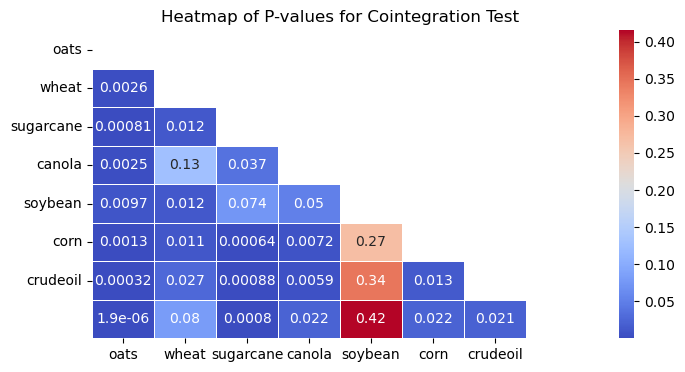

In [24]:
import numpy as np
import seaborn as sns


# Create a mask for the upper triangle
mask = np.triu(np.ones_like(p_value_matrix, dtype=bool))

# Create a heatmap of the p-value matrix with the mask
plt.figure(figsize=(8, 4))
sns.heatmap(
    p_value_matrix.T,
    mask=mask,
    xticklabels=data_df.columns[1:],
    yticklabels=data_df.columns[1:],
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
)
plt.title("Heatmap of P-values for Cointegration Test")
plt.show()

In [25]:
results_coint = pairs_trade_with_selection(data_df, "cointegration", window_size=252, sigma=2, transaction_cost=0.005)

100%|██████████| 304/304 [00:40<00:00,  7.51it/s]


In [26]:
calculate_stats(results_coint)

{'mean_return': 0.017284174389574535,
 'std_return': 0.09045269073317172,
 'min_return': -0.39118244039416095,
 'max_return': 0.39134137518115497,
 'q1_return': -0.022953342029641166,
 'q3_return': 0.06793669046139561,
 'sharpe_ratio': 0.1910852430090939,
 'skew_return': -0.01978804787146567,
 'kurtosis_return': 2.080587054611442}

100%|██████████| 304/304 [03:29<00:00,  1.45it/s]


(array([4.000e+00, 6.000e+00, 2.600e+01, 6.800e+01, 1.440e+02, 3.100e+02,
        6.420e+02, 1.079e+03, 3.202e+03, 1.443e+03, 8.900e+02, 3.930e+02,
        1.610e+02, 6.900e+01, 3.600e+01, 1.400e+01, 1.200e+01, 7.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([-0.39562665, -0.34680919, -0.29799174, -0.24917429, -0.20035683,
        -0.15153938, -0.10272193, -0.05390447, -0.00508702,  0.04373044,
         0.09254789,  0.14136534,  0.1901828 ,  0.23900025,  0.28781771,
         0.33663516,  0.38545261,  0.43427007,  0.48308752,  0.53190498,
         0.58072243,  0.62953988,  0.67835734,  0.72717479,  0.77599225,
         0.8248097 ,  0.87362715,  0.92244461,  0.97126206,  1.02007952,
         1.06889697,  1.11771442,  1.16653188,  1.21534933,  1.2

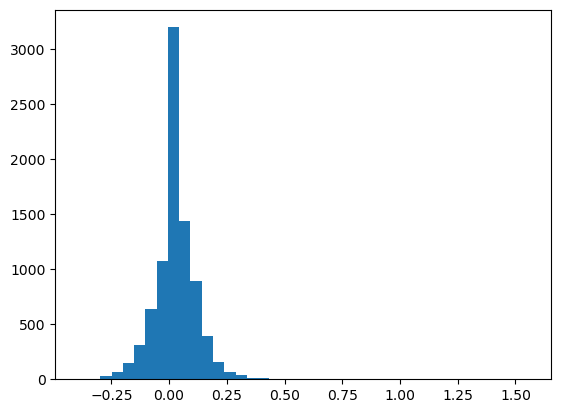

In [27]:
results_all = pairs_trade_with_selection(data_df, "all", window_size=252, sigma=2, transaction_cost=0.005)
calculate_stats(results_all)
plt.hist(results_all, bins=40)

## Robustness Tests

### Transaction fee

In [30]:
all_pairs = find_pairs_from_list(data_df.columns.tolist())
fee_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
fee_results = []
for fee in tqdm(fee_list):
    results = []
    for i, j in all_pairs:
        _, _, temp = pairs_trade(
            data_df, i, j, window_size=252, sigma=2, transaction_cost=fee, plot=False, figsize=(12, 4)
        )
        results.append(temp)
    fee_results.append(results)

100%|██████████| 10/10 [00:38<00:00,  3.85s/it]


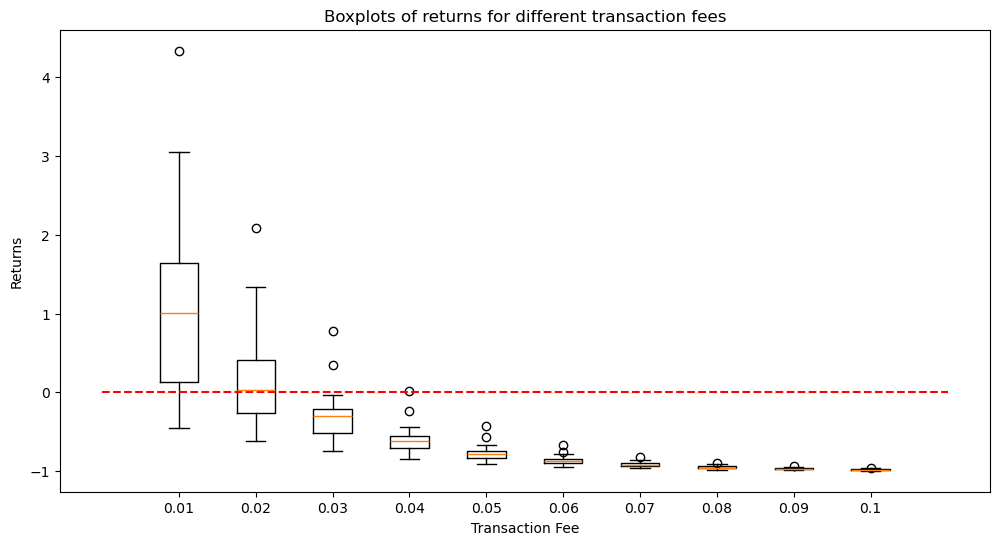

In [33]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each list in fee_results
ax.boxplot(fee_results)

# Set the x-axis labels to the corresponding fee values
ax.set_xticklabels(fee_list)

# Set the title and labels
ax.set_title("Boxplots of returns for different transaction fees")
ax.set_xlabel("Transaction Fee")
ax.set_ylabel("Returns")
ax.hlines(0, 0, len(fee_list) + 1, linestyles="dashed", colors="r")

# Show the plot
plt.show()

### Sigma

In [ ]:
all_pairs = find_pairs_from_list(data_df.columns[:].tolist())
sigma_list = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
sigma_results = []
for sigma in tqdm(sigma_list):
    results = []
    for i, j in all_pairs:
        _, _, temp = pairs_trade(
            data_df, i, j, window_size=252, sigma=sigma, transaction_cost=0.01, plot=False, figsize=(12, 4)
        )
        results.append(temp)
    sigma_results.append(results)

100%|██████████| 8/8 [00:31<00:00,  3.97s/it]


In [36]:
[str(x) for x in sigma_list]

['0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4']

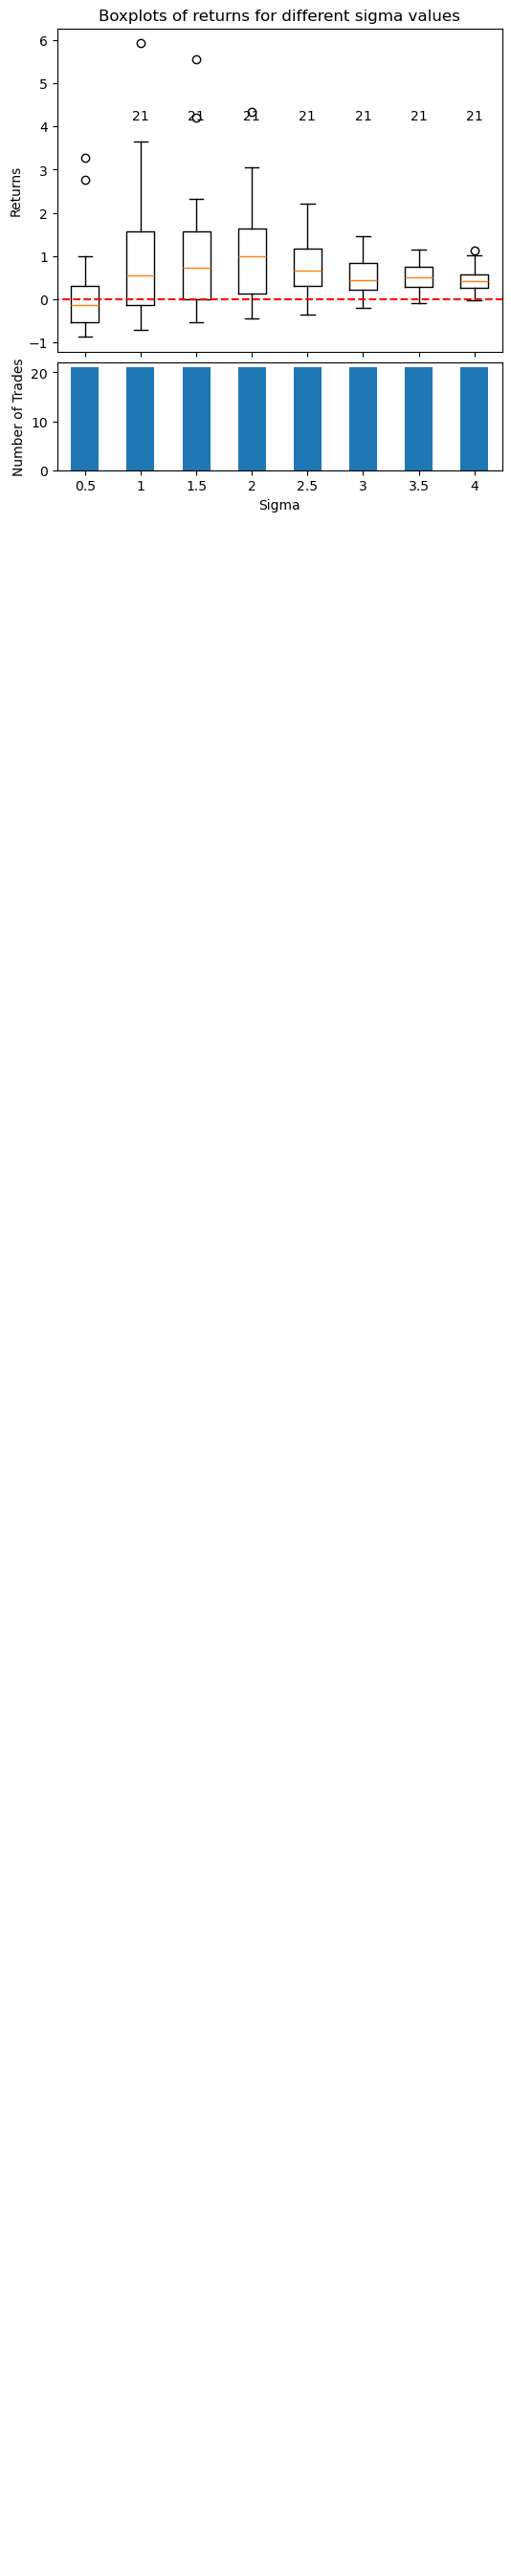

In [42]:
# Create a figure and axis
fig, ax = plt.subplots(2, figsize=(6, 6), sharex=True, gridspec_kw={"height_ratios": [3, 1]})

# Create boxplots for each list in sigma_results
ax[0].boxplot(sigma_results, positions=range(len(sigma_list)))

# Set the title and labels
ax[0].set_title("Boxplots of returns for different sigma values")
ax[0].set_ylabel("Returns")
ax[0].hlines(0, -5, len(sigma_list) + 1, linestyles="dashed", colors="r")

# Calculate the number of trades for each sigma
num_trades = [len(x) for x in sigma_results]

# Create a bar chart
bars = ax[1].bar([str(x) for x in sigma_list], num_trades, width=0.5)

# Set the title and labels
ax[1].set_xlabel("Sigma")
ax[1].set_ylabel("Number of Trades")
ax[1].set_xlabel("Sigma")
ax[1].set_ylabel("Number of Trades")
ax[1].set_xticklabels([str(x) for x in sigma_list])

height = bars[0].get_height()
ax[1].text(
    bars[0].get_x() + bars[0].get_width() / 2,
    height - 450,
    str(height),
    ha="center",
    va="bottom",
    fontsize=10,
    color="white",
)
for bar in bars[1:]:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, height + 50, str(height), ha="center", va="bottom", fontsize=10)


plt.subplots_adjust(hspace=0.05)  # Adjust the vertical space

# Show the plot
plt.show()